# Multi-layered Perzeptron für MFCC

In [1]:
max_file_count = None
none_replacement = 'all'

HIDDEN_LAYER_SIZE = (100,)  # (default)
RANDOM_STATE = 42

## MFCC Daten lesen

🔗 siehe [generate.ipynb](generate.ipynb)

In [2]:
import numpy as np

feature_matrix = np.load(f'feature_{max_file_count or none_replacement}.npy')
labels = np.load(f'labels_{max_file_count or none_replacement}.npy')

## Aufteilung in Trainings- und Testdaten

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.abs(feature_matrix), labels,
                                                    test_size=0.2, random_state=RANDOM_STATE)

In [4]:
print(X_train.shape)
print(X_test.shape)

(31763, 880)
(7941, 880)


## Training des Perzeptrons

In [5]:
from sklearn.neural_network import MLPClassifier
import time

start_time = time.time()

model = MLPClassifier(hidden_layer_sizes=HIDDEN_LAYER_SIZE, random_state=RANDOM_STATE)
model.fit(X_train, y_train)

print(f'Execution time: {time.time() - start_time:.2f}s')

Execution time: 53.60s


In [6]:
import skops.io as sio
sio.dump(model, f'mlp_{max_file_count or none_replacement}.skops')

## Leistung des Modells

In [7]:
y_test_predict = model.predict(X_test)

In [8]:
from sklearn import metrics

# proportion of correct predictions
print(f'accuracy:  {metrics.accuracy_score(y_test, y_test_predict):.4f}')

# proportion of true positives under all positives
print(f'precision: {metrics.precision_score(y_test, y_test_predict, zero_division=0):.4f}')

# proportion of true positives under actually positives
print(f'recall:    {metrics.recall_score(y_test, y_test_predict):.4f}')

# total performance
print(f'f1:        {metrics.f1_score(y_test, y_test_predict):.4f}')

accuracy:  0.9931
precision: 0.5432
recall:    0.7097
f1:        0.6154


In [9]:
print(metrics.classification_report(y_test, y_test_predict, zero_division=0))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      7879
           1       0.54      0.71      0.62        62

    accuracy                           0.99      7941
   macro avg       0.77      0.85      0.81      7941
weighted avg       0.99      0.99      0.99      7941



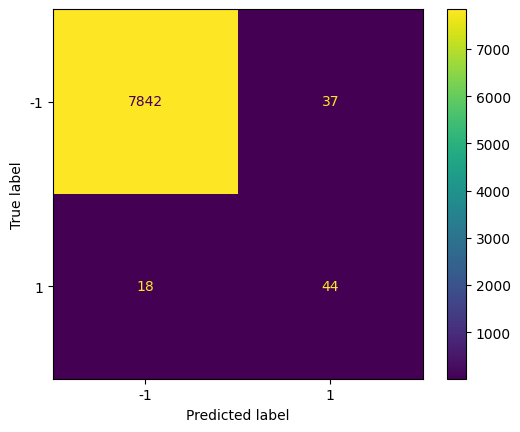

In [10]:
_ = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_predict)